<a href="https://colab.research.google.com/github/gcmillar/CEUS/blob/master/PeopleEnvironmentGrassGIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#        **Space-time Analytics of Human Physiology for Urban Planning**
---

## Paper
This is code and data for computational reproducibility of the following paper:

Garrett C. Millar, Ondrej Mitas, Wilco Boode Lisette Hoeke, Joost de Kruijff, Anna Petrasova, Helena Mitasova (2020): Space-time Analytics of Human Physiology for Urban Planning. In: Computers, Environment, and Urban Sytstems, In: *Advances in portable sensing methodologies for urban environments: Understanding cities from a mobility perspective*. [DOI here]

## Code
This is a modified version of a repository for reproducibility of the Millar et al. 2020 paper. The original repository is at ___.

The tools implementing the published methods are available at https://grass.osgeo.org/grass7/manuals/addons/.

## Run
Click play button in upper right corner to run code. 

## Directory Structure
The three elements of an algorithm are code, data and results. Code processes the data and outputs the results. In addition to that, we also specify the required runtime environment and metadata. This is how these elements map to the capsule file system:

*   **Code** goes in the Code pane. Your code will be copied to the code directory at the beginning of each run.
*   **Data** goes in the Data pane. Your data will be copied to the /data directory at the beginning of each run.
*   **Results** include any plots, figures, and resulting data, which should be saved in the /results directory. At the end of the run, these files will appear in the Results pane where you can view and download them.

---

# Software: **R**

---

Very first, and most needed step, load cell magic for R, and then begin each R-script cell with: `%%R`  

In [0]:
# activate R magic
%load_ext rpy2.ipython

## Setup

### GDAL & Colaboratory Notebooks 

Need to setup the colaboratory notebook with GDAL, to be used in R. As this will be running on a ubuntu server, run 
*   `apt-get update`
*   `apt-get install libgdal-dev` 
    *   – run this before trying to install GDAL otherwise you will get errors.
    * The flag -y accepts the download and runs – this is the longest part (but not too long)
*   Install python-gdal again with the -y flag
*   Install NumPy and SciPy (not compulsory, but why not?)
*   Test the installation by importing GDAL. No error? It should be ok.

In [0]:
%%capture
#Step 1
!apt-get update
#Step 2
!apt-get install libgdal-dev -y
#Step 3
!apt-get install python-gdal -y
#Step 4
!apt-get install python-numpy python-scipy -y
#Step 5
import gdal ## fingers crossed!

#### Install in R

In [6]:
%%R
install.packages("rgdal")
library(rgdal);

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: sp

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: rgdal: version: 1.4-8, (SVN revision 845)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: /usr/share/gdal/2.2
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.3-2 

  warnings.warn(x, RRuntimeWarning)


In [8]:
%%R
options(digits = 8)
if (!require(dplyr)) {install.packages("dplyr"); library(dplyr)}
if (!require(tidyr)) {install.packages("tidyr"); library(tidyr)}
if (!require(sp)) {install.packages("sp"); library(sp)}
if (!require(raster)) {install.packages("raster"); library(raster)}
if (!require(rgeos)) {install.packages("rgeos"); library(rgeos)}
if (!require(rgbif)) {install.packages("rgbif"); library(rgbif)}
if (!require(viridis)) {install.packages("viridis"); library(viridis)}
if (!require(gridExtra)) {install.packages("gridExtra"); library(gridExtra)}
if (!require(R.matlab)) {install.packages("R.matlab"); library(R.matlab)}
if (!require(plyr)) {install.packages("plyr"); library(plyr)}
if (!require(data.table)) {install.packages("data.table"); library(data.table)}
if (!require(maptools)) {install.packages("maptools"); library(maptools)}
if (!require(spatstat)) {install.packages("spatstat"); library(spatstat)}
if (!require(rasterVis)) {install.packages("rasterVis"); library(rasterVis)}
if (!require(leaflet)) {install.packages("leaflet"); library(leaflet)}
if (!require(RColorBrewer)) {install.packages("RColorBrewer"); library(RColorBrewer)}
if (!require(scales)) {install.packages("scales"); library(scales)}
if (!require(spgwr)) {install.packages("spgwr"); library(spgwr)}
if (!require(gdalUtils)) {install.packages("gdalUtils"); library(gdalUtils)}
if (!require(devtools)) {install.packages("devtools"); library(devtools)}
if (!require(tidyverse)) {install.packages("tidyverse"); library(tidyverse)}
if (!require(sf)) {install.packages("sf"); library(sf)}
if (!require(ggmap)) {install.packages("ggmap"); library(ggmap)}
if (!require(formatR)) {install.packages("formatR"); library(formatR)}
if (!require(stats)) {install.packages("stats"); library(stats)}
# if (!require(rgdal)) {install.packages("rgdal"); library(rgdal)}
if (!require(data.table)) {install.packages("data.table"); library(data.table)}
if (!require(lubridate)) {install.packages("lubridate"); library(lubridate)}
if (!require(ggplot2)) {install.packages("ggplot2"); library(ggplot2)}
if (!require(grid)) {install.packages("grid"); library(grid)}
if (!require(gridExtra)) {install.packages("gridExtra"); library(gridExtra)}
if (!require(lattice)) {install.packages("lattice"); library(lattice)}
# install.packages('https://cran.r-project.org/src/contrib/rgdal_1.4-8.tar.gz', type="source")
# library(rgdal)
if (!require(leaflet)) {install.packages("leaflet"); library(leaflet)};

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: dplyr

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: tidyr

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required pa


Error in library(sf) : there is no package called ‘sf’


/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in library(sf) : there is no package called ‘sf’

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: There were 14 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)


## Data Processing

Read in CEUS Initial Cyclist Data [.csv]; using online link from GitHub:

> **File Description**: Initial dataset for CEUS analysis (.csv of cyclists' location and physiological data) 
<!-- ~~~ -->
 <!-- **File Description**: Initial dataset for CEUS analysis (.csv of cyclists' location and physiological data)  -->
<!-- ~~~ -->


In [9]:
# import csv
!wget "https://raw.githubusercontent.com/gcmillar/CEUS/master/CHIPS_all.csv"

--2020-01-19 18:49:34--  https://raw.githubusercontent.com/gcmillar/CEUS/master/CHIPS_all.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24581967 (23M) [text/plain]
Saving to: ‘CHIPS_all.csv’

CHIPS_all.csv       100%[===================>]  23.44M  40.3MB/s    in 0.6s    

2020-01-19 18:49:35 (40.3 MB/s) - ‘CHIPS_all.csv’ saved [24581967/24581967]



In [10]:
%%R
setwd("/content/")
CHIPS_df <- read.table("CHIPS_all.csv", header = TRUE, row.names=NULL, sep=",")
setnames(CHIPS_df, "long", "lon")
head(CHIPS_df)

  participant time conductance conductance_z      phasic    phasic_z      tonic
1           1 0.00    0.793927    -1.3018331 0.066627671 0.009995110 0.72729933
2           1 0.25    0.797768    -1.3012050 0.070468671 0.010623231 0.72729933
3           1 0.50    0.793927    -1.3018331 0.066710821 0.010000283 0.72721618
4           1 0.75    0.793927    -1.3018331 0.066901547 0.010013549 0.72702545
5           1 1.00    0.795207    -1.3016238 0.068476940 0.010245688 0.72673006
6           1 1.25    0.795207    -1.3016238 0.068863176 0.010278589 0.72634382
     tonic_z       lat     lon altitude distance speed speed2 power
1 -1.3118282 51.693625 5.04576        2        0     0      0     0
2 -1.3118282 51.693625 5.04576        2        0     0      0     0
3 -1.3118334 51.693625 5.04576        2        0     0      0     0
4 -1.3118466 51.693625 5.04576        2        0     0      0     0
5 -1.3118694 51.693625 5.04576        2        0     0      0     0
6 -1.3119023 51.693625 5.04576  

### Artifact Correction
The script and descriptions below detail the process of removing the first and last 4.00% of the raw skin conductance data to correct for artifacts: 
Using time, we know 4.00% of `max(CHIPS_df$time)` is `max(CHIPS_df$time) * 0.040` seconds. So, we'll delete the first and last `max(CHIPS_df$time) * 0.040` seconds (or `max(CHIPS_df$time) * 0.040 / 60` 
minutes) in the data to remove the observed artifacts. Since the data was collected every 0.25 seconds, that means `round(max(CHIPS_df$time) * 0.040 * 4)` rows should be deleted at the beginning and end of the data set.

In [14]:
%%R
unique(CHIPS_df$participant)
# keeping specific pt data
CHIPS_pts <- CHIPS_df
# data needs to first be separated by participants to remove artifacts 
pt1 <- CHIPS_pts[CHIPS_pts$participant == 1, ]
pt2 <- CHIPS_pts[CHIPS_pts$participant == 2, ]
pt3 <- CHIPS_pts[CHIPS_pts$participant == 3, ]
pt4 <- CHIPS_pts[CHIPS_pts$participant == 4, ]
pt5 <- CHIPS_pts[CHIPS_pts$participant == 5, ]
pt6 <- CHIPS_pts[CHIPS_pts$participant == 6, ]
pt7 <- CHIPS_pts[CHIPS_pts$participant == 7, ]
pt8 <- CHIPS_pts[CHIPS_pts$participant == 8, ]
pt9 <- CHIPS_pts[CHIPS_pts$participant == 9, ]
pt10 <- CHIPS_pts[CHIPS_pts$participant == 10, ]
pt11 <- CHIPS_pts[CHIPS_pts$participant == 11, ]
pt12 <- CHIPS_pts[CHIPS_pts$participant == 12, ]
# first rows
N <- round(max(CHIPS_pts$time) * 0.040 * 4)
pt1 <- pt1[-(1:N), , drop = FALSE]
pt2 <- pt2[-(1:N), , drop = FALSE]
pt3 <- pt3[-(1:N), , drop = FALSE]
pt4 <- pt4[-(1:N), , drop = FALSE]
pt5 <- pt5[-(1:N), , drop = FALSE]
pt6 <- pt6[-(1:N), , drop = FALSE]
pt7 <- pt7[-(1:N), , drop = FALSE]
pt8 <- pt8[-(1:N), , drop = FALSE]
pt9 <- pt9[-(1:N), , drop = FALSE]
pt10 <- pt10[-(1:N), , drop = FALSE]
pt11 <- pt11[-(1:N), , drop = FALSE]
pt12 <- pt12[-(1:N), , drop = FALSE]
# last rows
N.2 <- round(max(CHIPS_pts$time) * 0.040 * 4)
pt1 <- pt1[1:(nrow(pt1)-N.2),]
pt2 <- pt2[1:(nrow(pt2)-N.2),]
pt3 <- pt3[1:(nrow(pt3)-N.2),]
pt4 <- pt4[1:(nrow(pt4)-N.2),]
pt5 <- pt5[1:(nrow(pt5)-N.2),]
pt6 <- pt6[1:(nrow(pt6)-N.2),]
pt7 <- pt7[1:(nrow(pt7)-N.2),]
pt8 <- pt8[1:(nrow(pt8)-N.2),]
pt9 <- pt9[1:(nrow(pt9)-N.2),]
pt10 <- pt10[1:(nrow(pt10)-N.2),]
pt11 <- pt11[1:(nrow(pt11)-N.2),]
pt12 <- pt12[1:(nrow(pt12)-N.2),]

head(pt12)

       participant   time conductance conductance_z     phasic   phasic_z
180492          12 180.00    1.736116   -0.89114065 0.43757066 0.50406617
180493          12 180.25    1.750206   -0.87470662 0.43082627 0.49661933
180494          12 180.50    1.748925   -0.87620073 0.41152351 0.47456467
180495          12 180.75    1.768139   -0.85379025 0.41534734 0.47949793
180496          12 181.00    1.757892   -0.86574196 0.39205259 0.45279037
180497          12 181.25    1.688721   -0.94642037 0.31185251 0.35968177
           tonic    tonic_z       lat      lon altitude distance speed speed2
180492 1.2985453 -1.3952068 51.689022 5.049557      2.7   1373.3   0.0   0.00
180493 1.3193797 -1.3713259 51.689022 5.049557      2.7   1373.3   0.0   0.00
180494 1.3374015 -1.3507654 51.688829 5.049606      2.9   1395.0   5.4  19.44
180495 1.3527917 -1.3332882 51.688829 5.049606      2.9   1395.0   5.4  19.44
180496 1.3658394 -1.3185323 51.688829 5.049606      2.9   1395.0   5.4  19.44
180497 1.37686

### Joining 
All participant data that were just separated and cleaned by using time are re-included into the same data frame.

In [15]:
%%R
# join
CHIPS_df_clean <- do.call("rbind", list(pt1, pt2, pt3, pt4, pt5, pt6, pt7, pt8, 
                                              pt9, pt10, pt11, pt12))
CHIPS_df_clean <- add_count(CHIPS_df_clean, lon, lat, name = "data.points.n")
CHIPS_df_clean$lon.lat <- paste(CHIPS_df_clean$lon, CHIPS_df_clean$lat, sep=",")
CHIPS_time.in.cell <- aggregate(time ~ lat + lon, data = CHIPS_df_clean, sum)

head(CHIPS_df_clean)

# A tibble: 6 x 17
  participant  time conductance conductance_z  phasic phasic_z tonic tonic_z
        <int> <dbl>       <dbl>         <dbl>   <dbl>    <dbl> <dbl>   <dbl>
1           1  180        0.789         -1.30 0.00781 0.00149  0.782   -1.30
2           1  180.       0.789         -1.30 0.00651 0.00128  0.782   -1.30
3           1  180.       0.788         -1.30 0.00522 0.00107  0.783   -1.30
4           1  181.       0.788         -1.30 0.00393 0.000858 0.784   -1.30
5           1  181        0.787         -1.30 0.00264 0.000654 0.785   -1.30
6           1  181.       0.787         -1.30 0.00134 0.000453 0.785   -1.30
# … with 9 more variables: lat <dbl>, lon <dbl>, altitude <dbl>,
#   distance <dbl>, speed <dbl>, speed2 <dbl>, power <dbl>,
#   data.points.n <int>, lon.lat <chr>


## Initial Visualizations **[will most likely be deleted]**
### GPS

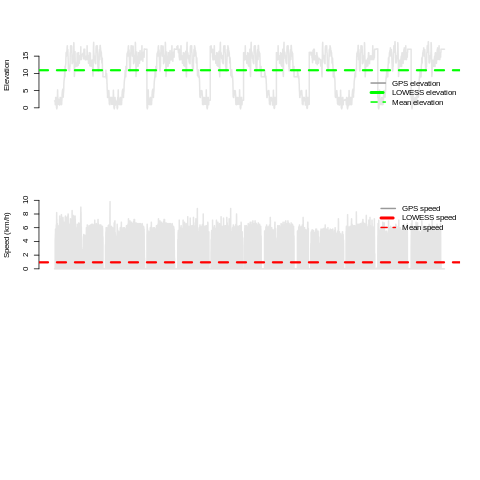

In [0]:
%%R
# Calculating metres per seconds, kilometres per hour, and two LOWESS smoothers to get rid of some noise.
# CHIPS_df$speed.m.per.sec <- CHIPS_df$dist.to.prev / CHIPS_df$time.diff.to.prev
# CHIPS_df$speed.km.per.h <- CHIPS_df$speed.m.per.sec * 3.6
# CHIPS_df$speed.km.per.h <- ifelse(is.na(CHIPS_df$speed.km.per.h), 0,CHIPS_df$speed.km.per.h)
# CHIPS_df$lowess.speed <- lowess(CHIPS_df$speed, f = 0.2)$y
# CHIPS_df$lowess.alt <- lowess(CHIPS_df$altitude, f = 0.2)$y
# CHIPS_df$lowess.conduct <- lowess(CHIPS_df$phasic_z, f = 0.2)$y
# Now, let’s plot all the stuff!
# Plot elevations and smoother
layout(matrix(1:3, nrow=3))
elev <- plot(CHIPS_df$altitude, type = "l", bty = "n", xaxt = "n", lwd= 2,
     ylab = "Elevation",
     xlab = "", col = "grey90")
lines(CHIPS_df$lowess.alt, col = "green", lwd = 3)
abline(h = mean(CHIPS_df$altitude), lty = 2, lwd = 3, col = "green")
legend(x="bottomright", legend = c("GPS elevation", "LOWESS elevation",
                                "Mean elevation"),
       col = c("grey60", "green", "green"), lwd = c(2,4,2), lty = c(1,2,2),
       bty = "n")
# Plot speeds and smoother
speed <- plot(CHIPS_df$speed, type = "l", bty = "n", lwd= 2, xaxt = "n",
     ylab = "Speed (km/h)", xlab = "", col = "grey90")
lines(CHIPS_df$lowess.speed, col = "red", lwd = 3)
abline(h = mean(CHIPS_df$speed), lty = 2, lwd = 3, col = "red")
legend(x="topright", legend = c("GPS speed", "LOWESS speed",
                                   "Mean speed"),
       col = c("grey60", "red", "red"), lwd = c(2,4,2), lty = c(1,2,2),
       bty = "n")
# Plot conductnace and smoother
# conduct_smooth <- plot(CHIPS_df$phasic_z, type = "l", bty = "n", lwd= 3, xaxt = "n",
#      ylab = "Skin Conductance", xlab = "", col = "grey60")
# lines(CHIPS_df$lowess.conduct, col = "blue", lwd = 3)
# abline(h = mean(CHIPS_df$phasic_z), lty = 2, lwd = 3,  col = "blue")
# legend(x="topright",
#        legend = c("Conductance", "LOWESS conductance", "Mean conductance"),
#        col = c("grey60", "blue", "blue"), lwd = c(2,4,2), lty = c(1,2,2),
#        bty = "n")

### Skin Conductance
Half participants went Waalwijk --> Tilburg, other half went Tilburg --> Waalwijk:
*   `Waalwijk --> Tilburg: 1, 3, 4, 10, 11, 12`
*   `Tilburg --> Waalwijk: 2, 5, 6, 7, 8, 9
Groups need to be split for proper GPS data visualiztion

Plotting SCR data as a function of elevation and speed by time stamps of each way point using `ggplot`. This helps examine examine potentially confounding effects between variables.

As to not confuse ggplot, we do not pass the `SpatialPointsDataFrame`-object directly, but convert it to a regular data frame with `as.data.frame()`:

In [16]:
%%R
CHIPS_df_clean$direction <- NA
CHIPS_df_clean$direction[which(CHIPS_df_clean$participant %in% c(1, 3, 4, 10, 11, 12))] <- "waal_til"
CHIPS_df_clean$direction[which(CHIPS_df_clean$participant %in% c(2, 5, 6, 7, 8, 9))] <- "til_waal"
CHIPS_df_clean$direction <- as.factor(CHIPS_df_clean$direction)
CHIPS_waal_til <- subset(CHIPS_df_clean, direction=="waal_til")
CHIPS_til_waal <- subset(CHIPS_df_clean, direction=="til_waal")
head(CHIPS_df_clean$direction)
head(CHIPS_waal_til)
head(CHIPS_til_waal)

# A tibble: 6 x 18
  participant  time conductance conductance_z phasic phasic_z tonic tonic_z
        <int> <dbl>       <dbl>         <dbl>  <dbl>    <dbl> <dbl>   <dbl>
1           2  180         4.16         0.153  0.513    0.196  3.65 -0.0424
2           2  180.        4.14         0.147  0.501    0.191  3.64 -0.0440
3           2  180.        4.50         0.279  0.864    0.324  3.64 -0.0456
4           2  181.        4.50         0.278  0.867    0.325  3.63 -0.0472
5           2  181         4.40         0.243  0.776    0.292  3.63 -0.0489
6           2  181.        4.33         0.215  0.706    0.265  3.62 -0.0506
# … with 10 more variables: lat <dbl>, lon <dbl>, altitude <dbl>,
#   distance <dbl>, speed <dbl>, speed2 <dbl>, power <dbl>,
#   data.points.n <int>, lon.lat <chr>, direction <fct>


In [0]:
%%R
# restricting decimal places for graphs
options(digits = 0)
# plot of time and elevation, colored by skin conductance
# CHIPS_waal_til
time_elev_conduct_plot.waal_til <- ggplot(as.data.frame(CHIPS_waal_til), # convert to regular dataframe
                                          aes(x=time, y=altitude, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3",
                        midpoint = median(CHIPS_df$phasic_z),
                        breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080"),
        legend.title = element_blank()) +
  theme_linedraw(base_size = 28) +
  geom_point(alpha = 0.6, size = 3.5, show.legend = FALSE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
   # theme_bw() + 
   ggtitle("Waalwijk to Tilburg") +
  labs(x='\nCycling time', y='')

# CHIPS_til_waal
CHIPS_til_waal[order(CHIPS_til_waal$distance),]
CHIPS_til_waal$participant[1:50]
time_elev_conduct_plot.til_waal <- ggplot(as.data.frame(CHIPS_til_waal), # convert to regular dataframe
            aes(x=time, y=altitude, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
                       midpoint = median(CHIPS_df$phasic_z),
                       breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080")) +
  theme_linedraw(base_size = 28) +
  geom_point(alpha = 0.6, size = 3.5, show.legend = FALSE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
  ggtitle("Tilburg to Waalwijk") +
  labs(x='\nCycling time', y='')
# together
grid.arrange(time_elev_conduct_plot.waal_til, time_elev_conduct_plot.til_waal, ncol=2)

# plot of time and speed, colored by skin conductance
# CHIPS_waal_til

# subset(CHIPS_waal_til, CHIPS_waal_til$participant==9,CHIPS_waal_til$distance>100)

time_speed_conduct_plot.waal_til <- ggplot(as.data.frame(CHIPS_waal_til), # convert to regular dataframe
                                          aes(x=time, y=speed, color = phasic_z)) +
  geom_smooth(span = 0.3, colour="darkgray", size=3, alpha=0.6) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
                        midpoint = median(CHIPS_df$phasic_z),
                        breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080"),
        legend.title = element_blank()) +
  theme_linedraw(base_size = 28) +
  geom_point(alpha = 0.6, size = 3.5, show.legend = FALSE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
   # theme_bw() + 
   ggtitle("Waalwijk to Tilburg") +
  labs(x='\nCycling time', y='')
# CHIPS_til_waal
time_speed_conduct_plot.til_waal <- ggplot(as.data.frame(CHIPS_til_waal), # convert to regular dataframe
            aes(x=time, y=speed, color = phasic_z)) +
  geom_smooth(span = 0.3, colour="darkgray", size=3, alpha=0.6) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
                       midpoint = median(CHIPS_df$phasic_z),
                       breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080")) +
  theme_linedraw(base_size = 28) +
  geom_point(alpha = 0.6, size = 3.5, show.legend = FALSE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
  ggtitle("Tilburg to Waalwijk") +
  labs(x='\nCycling time', y='')
# together
grid.arrange(time_speed_conduct_plot.waal_til, time_speed_conduct_plot.til_waal, ncol=2)


# direction instead of time on x axis
# first elevation
# order_by(CHIPS_waal_til$altitude, CHIPS_waal_til$distance)
CHIPS_waal_til <- subset(CHIPS_waal_til, distance>=100)
dist_elev_conduct_plot.waal_til <- ggplot(as.data.frame(CHIPS_waal_til), # convert to regular dataframe
                                          aes(x=distance, y=altitude, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3",
                        midpoint = median(CHIPS_df$phasic_z),
                        breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080"),
        legend.title = element_blank()) +
  theme_linedraw(base_size = 28) +
  geom_point(alpha = 0.6, size = 3.5, show.legend = FALSE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
   # theme_bw() + 
   ggtitle("Waalwijk to Tilburg") +
  labs(x='\nDistance (m)', y='')

# CHIPS_til_waal
CHIPS_til_waal <- subset(CHIPS_til_waal, distance>=100)
dist_elev_conduct_plot.til_waal <- ggplot(as.data.frame(CHIPS_til_waal), # convert to regular dataframe
            aes(x=distance, y=altitude, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
                       midpoint = median(CHIPS_df$phasic_z),
                       breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080")) +
  theme_linedraw(base_size = 28) +
  geom_point(alpha = 0.6, size = 3.5, show.legend = FALSE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
  ggtitle("Tilburg to Waalwijk") +
  labs(x='\nDistance (m)', y='')
# together
grid.arrange(dist_elev_conduct_plot.waal_til,dist_elev_conduct_plot.til_waal, ncol=2)


# now for speed

dist_speed_conduct_plot.waal_til <- ggplot(as.data.frame(CHIPS_waal_til), # convert to regular dataframe
                                          aes(x=distance, y=speed, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3",
                        midpoint = median(CHIPS_df$phasic_z),
                        breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080"),
        legend.title = element_blank()) +
  theme_linedraw(base_size = 28) +
  geom_point(alpha = 0.6, size = 3.5, show.legend = FALSE) + 
  geom_point() + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
   # theme_bw() + 
   ggtitle("Waalwijk to Tilburg") +
  labs(x='\nDistance (m)', y='')

# CHIPS_til_waal
CHIPS_til_waal <- subset(CHIPS_til_waal, speed>0)
dist_speed_conduct_plot.til_waal <- ggplot(as.data.frame(CHIPS_til_waal), # convert to regular dataframe
            aes(x=distance, y=speed, color = phasic_z)) +
  scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
                       midpoint = median(CHIPS_df$phasic_z),
                       breaks=seq(min(CHIPS_df$phasic_z), max(CHIPS_df$phasic_z),
                                    (max(CHIPS_df$phasic_z)-min(CHIPS_df$phasic_z))/4)) +
  theme(panel.grid.major = element_line(colour = "#808080")) +
  theme_linedraw(base_size = 28) +
  geom_point(alpha = 0.6, size = 3.5, show.legend = FALSE) + 
  geom_smooth(span = 0.3, colour="#90CA77", size=3, alpha=0.6) +
  ggtitle("Tilburg to Waalwijk") +
  labs(x='\nDistance (m)', y='')
# together
grid.arrange(dist_speed_conduct_plot.waal_til,dist_speed_conduct_plot.til_waal, ncol=2)


# resetting decimal places to default
options(digits = 8)
# # plot of time and elevation, colored by skin conductance
# time_ele_conduct_plot <- ggplot(as.data.frame(CHIPS_df), # convert to regular dataframe
#             aes(x=time, y=altitude, color = phasic_z)) +
#             scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
#                        midpoint = median(CHIPS_df$phasic_z)) +
#             theme_bw() +
#             geom_point(alpha = 0.8, size = 2) + 
#             labs(x='\nCycling time', y='Elevation (meters)\n')
# # plot of time and speed, colored by skin conductance
# time_speed_conduct_plot <- ggplot(as.data.frame(CHIPS_df), # convert to regular dataframe
#             aes(x=time, y=speed, color = phasic_z)) +
#             scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
#                        midpoint = median(CHIPS_df$phasic_z)) +
#             theme_bw() +
#             geom_point(alpha = 0.8,size = 2) + 
#   labs(x='\nCycling time', y='Speed (km/h)\n')
# grid.arrange(time_ele_conduct_plot, time_speed_conduct_plot, nrow=2)
# # plot of location, sized by speed
# ggplot(as.data.frame(CHIPS_df), 
#        aes(x=lat, y=lon, color = phasic_z)) +
#         scale_color_gradient2(low= "dodgerblue4", mid="slategray2", high="red3", 
#                               midpoint = median(CHIPS_df$phasic_z)) +
#             theme_bw() +
#             geom_point(alpha = 0.4, size = rev(CHIPS_df$speed)) + labs(x='\nCycling time', y='Speed (km/h)\n')

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: `geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

  warnings.warn(x, RRuntimeWarning)


# Spatial Data 
For spatial analyses to occur, we need to convert the data frame into a spatial data frame. The functions `r coordinates()` and `r projection()` from `sp` library converts the dataset into spatial objects that mapview supports.

In particular, coordinates specifies the latitude and longitude of the data and proj4string creates the projection layer, i.e. the coordinate system. As you know, the EPSG: 4326 means that the coordinates are latitude-longitude pairs on a reference ellipsoid given by WGS84, projected with Mercator Projection.


## Processing & Transformation

In [0]:
%%R
# Data Processing
CHIPS_lonlat_sp <- CHIPS_df
# First, ensuring a default long / lat is assigned to the coordinates:
## Specifying coordinates in raw data
coordinates(CHIPS_lonlat_sp) <- ~ lon + lat
## Setting default projection
proj4string(CHIPS_lonlat_sp) <- CRS("+init=epsg:4326 +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs +towgs84=0,0,0")
# Then, transform the coordinates to UTM, using its proper CRS [EPSG:28992; RD / Amersfoort].
## Transforming coordinates to UTM
CHIPS_sp <- spTransform(CHIPS_lonlat_sp, "+proj=sterea +lat_0=52.15616055555555 +lon_0=5.38763888888889 +k=0.9999079 +x_0=155000 +y_0=463000 +ellps=bessel +units=m +no_defs")
# Creating specific participant data frames
pt1 <- CHIPS_sp[CHIPS_sp$participant == 1, ]
pt2 <- CHIPS_sp[CHIPS_sp$participant == 2, ]
pt3 <- CHIPS_sp[CHIPS_sp$participant == 3, ]
pt4 <- CHIPS_sp[CHIPS_sp$participant == 4, ]
pt5 <- CHIPS_sp[CHIPS_sp$participant == 5, ]
pt6 <- CHIPS_sp[CHIPS_sp$participant == 6, ]
pt7 <- CHIPS_sp[CHIPS_sp$participant == 7, ]
pt8 <- CHIPS_sp[CHIPS_sp$participant == 8, ]
pt9 <- CHIPS_sp[CHIPS_sp$participant == 9, ]
pt10 <- CHIPS_sp[CHIPS_sp$participant == 10, ]
pt11 <- CHIPS_sp[CHIPS_sp$participant == 11, ]
pt12 <- CHIPS_sp[CHIPS_sp$participant == 12, ]
# Test Plotting Code
# par(mfrow=c(3,2))
# plot(pt1, axes=T, pch=1, cex=0.3)
# plot(pt2, axes=F, pch=1, cex=0.3)
# plot(pt3, axes=F, pch=1, cex=0.3)
# plot(pt5, axes=F, pch=1, cex=0.3)
# plot(pt6, axes=F, pch=1, cex=0.3)
# plot(pt7, axes=F, pch=1, cex=0.3)

## Processing & Export for Interactive Application - Stress3d
Using the same approach above for the web-mapping application, Stress3d. Mapbox, and web-mapping in general, requires standard latitude and longitude coordinates [EPSG:4326; WGS 84]. Exporting to GeoJSON format, also usually preferred by web-mapping applications.

In [0]:
%%R
CHIPS_lonlat <- CHIPS_df
coordinates(CHIPS_lonlat) <- ~ lon + lat
# Setting default projection
proj4string(CHIPS_lonlat) <- CRS('+proj=longlat +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs')
pt1 <- CHIPS_lonlat[CHIPS_lonlat$participant == 1, ]
pt2 <- CHIPS_lonlat[CHIPS_lonlat$participant == 2, ]
pt3 <- CHIPS_lonlat[CHIPS_lonlat$participant == 3, ]
pt4 <- CHIPS_lonlat[CHIPS_lonlat$participant == 4, ]
pt5 <- CHIPS_lonlat[CHIPS_lonlat$participant == 5, ]
pt6 <- CHIPS_lonlat[CHIPS_lonlat$participant == 6, ]
pt7 <- CHIPS_lonlat[CHIPS_lonlat$participant == 7, ]
pt8 <- CHIPS_lonlat[CHIPS_lonlat$participant == 8, ]
pt9 <- CHIPS_lonlat[CHIPS_lonlat$participant == 9, ]
pt10 <- CHIPS_lonlat[CHIPS_lonlat$participant == 10, ]
pt11 <- CHIPS_lonlat[CHIPS_lonlat$participant == 11, ]
pt12 <- CHIPS_lonlat[CHIPS_lonlat$participant == 12, ]
# Exporting to GeoJSON
# writeOGR(CHIPS_lonlat, "/Users/garrettmillar/Desktop/CHIPS/CHIPS_all_pts",
#          layer="CHIPS_lonlat", driver="GeoJSON")

# Web-mapping

In [0]:
%%R
if (!require(leaflet)) {install.packages("leaflet"); library(leaflet)}
if (!require(pals)) {install.packages("pals"); library(pals)}

conduct.pal <- colorNumeric (c("dodgerblue4", "slategray2", "red3"), 
                             CHIPS_df$phasic_z)
m <- leaflet() %>%
  # Add tiles
  addProviderTiles("Esri.WorldTopoMap", group = "Topographical") %>%
  addProviderTiles("OpenStreetMap.Mapnik", group = "Road map") %>%
  addProviderTiles("Esri.WorldImagery", group = "Satellite") %>%
  addCircles (data=CHIPS_df, group='Participant 1', stroke = T, radius = 80, 
              fillOpacity = 0.2, fillColor = conduct.pal(CHIPS_df$phasic_z),
              opacity = 0.2, color = conduct.pal(CHIPS_df$phasic_z)) %>%
  # addCircles (data=pt2, group='Participant 2', stroke = T, radius = 80, 
  #             fillOpacity = 0.2, fillColor = conduct.pal(pt2$phasic_z),
  #             opacity = 0.2, color = conduct.pal(pt2$phasic_z)) %>%
  # addCircles (data=pt3, group='Participant 3', stroke = T, radius = 80, 
  #             fillOpacity = 0.2, fillColor = conduct.pal(pt3$phasic_z),
  #             opacity = 0.2, color = conduct.pal(pt3$phasic_z)) %>%
  # addCircles (data=pt4, group='Participant 4', stroke = T, radius = 80, 
  #             fillOpacity = 0.2, fillColor = conduct.pal(pt4$phasic_z),
  #             opacity = 0.2, color = conduct.pal(pt4$phasic_z)) %>%
  # addCircles (data=pt5, group='Participant 5', stroke = T, radius = 80, 
  #             fillOpacity = 0.2, fillColor = conduct.pal(pt5$phasic_z),
  #             opacity = 0.2, color = conduct.pal(pt5$phasic_z)) %>%
  # addCircles (data=pt6, group='Participant 6', stroke = T, radius = 80, 
  #             fillOpacity = 0.2, fillColor = conduct.pal(pt6$phasic_z),
  #             opacity = 0.2, color = conduct.pal(pt6$phasic_z)) %>%
  # addCircles (data=pt7, group='Participant 7', stroke = T, radius = 80, 
  #             fillOpacity = 0.2, fillColor = conduct.pal(pt7$phasic_z),
  #             opacity = 0.2, color = conduct.pal(pt7$phasic_z)) %>%
  # addCircles (data=pt8, group='Participant 8', stroke = T, radius = 80, 
  #             fillOpacity = 0.2, fillColor = conduct.pal(pt8$phasic_z),
  #             opacity = 0.2, color = conduct.pal(pt8$phasic_z)) %>%
  # addCircles (data=pt9, group='Participant 9', stroke = T, radius = 80, 
  #             fillOpacity = 0.2, fillColor = conduct.pal(pt9$phasic_z),
  #             opacity = 0.2, color = conduct.pal(pt9$phasic_z)) %>%
  # addCircles (data=pt10, group='Participant 10', stroke = T, radius = 80, 
  #             fillOpacity = 0.2, fillColor = conduct.pal(pt10$phasic_z),
  #             opacity = 0.2, color = conduct.pal(pt10$phasic_z)) %>%
  # addCircles (data=pt11, group='Participant 11', stroke = T, radius = 80, 
  #             fillOpacity = 0.2, fillColor = conduct.pal(pt11$phasic_z),
  #             opacity = 0.2, color = conduct.pal(pt11$phasic_z)) %>%
  # Layers control
  addLayersControl(position = 'bottomright',
                   baseGroups = c("Topographical", "Road map", "Satellite"),
                   # overlayGroups = c("Participant 1", "Participant 2", 
                   #                   "Participant 3", "Participant 4", 
                   #                   "Participant 5", "Participant 6",
                   #                   "Participant 7", "Participant 8", 
                   #                   "Participant 9", "Participant 10", 
                   #                   "Participant 11"),
                   options = layersControlOptions(collapsed = FALSE)) %>%
  # hideGroup(c("Participant 2", "Participant 3", "Participant 4", "Participant 5", 
  #             "Participant 6", "Participant 7", "Participant 8", "Participant 9",
  #             "Participant 10", "Participant 11")) %>%
  addLegend(values = CHIPS_df$phasic_z, pal = conduct.pal, 
            opacity = 1, title = "Skin Conductivity", position = "bottomleft")
m


In [0]:
# # Import libraries.
# import ee
# import folium
# display(m)

## Exporting as Vector to GRASS
The following computes multiple csv files designed to be seamlessly imported into GRASS. Coordinates are in UTM [EPSG:28992; RD / Amersfoort] format, csv separator is set to pipe ("|" - GRASS's default import setting). Each csv file is created with three columns as to not weigh down GRASS's computation time. However, these csv's can easily be created as one (excluding time in each cell as this requires full aggregation; see last script section).

In [0]:
%%R
# # ------------------------------------------------------------ # #
# phasic
lonlat_phasic <- as.data.frame(matrix(nrow=length(CHIPS_sp@coords[,1]), ncol=3))
colnames(lonlat_phasic) <- c("lon","lat","phasic")
lonlat_phasic$lon <-CHIPS_sp@coords[,1] 
lonlat_phasic$lat <-CHIPS_sp@coords[,2] 
lonlat_phasic$phasic <- CHIPS_sp@data$phasic_z
write.table(lonlat_phasic, row.names = F, quote = F,
            col.names = F, sep = "|", dec = ".",
            "/content/lonlat_phasic.txt")
# # ------------------------------------------------------------ # #
# data points (data.points.n)
lonlat_data.n <- as.data.frame(matrix(nrow=length(CHIPS_sp@coords[,1]), ncol=3))
colnames(lonlat_data.n) <- c("lon","lat","data.n")
lonlat_data.n$lon <-CHIPS_sp@coords[,1] 
lonlat_data.n$lat <-CHIPS_sp@coords[,2] 
lonlat_data.n$data.n <- CHIPS_sp@data$data.points.n
write.table(lonlat_data.n, row.names = F, quote = F,
            col.names = F, sep = "|", dec = ".",
            "/content/lonlat_data.n.txt")
# # ------------------------------------------------------------ # #
# time
lonlat_time <- as.data.frame(matrix(nrow=length(CHIPS_sp@coords[,1]), ncol=3))
colnames(lonlat_time) <- c("lon","lat","time")
lonlat_time$lon <-CHIPS_sp@coords[,1]
lonlat_time$lat <-CHIPS_sp@coords[,2]
lonlat_time$time <- CHIPS_sp@data$time
write.table(lonlat_time, row.names = F, quote = F,
            col.names = F, sep = "|", dec = ".",
            "/content/lonlat_time.txt")
# # ------------------------------------------------------------ # #
# time in each cell
lon <- CHIPS_sp@coords[,1]
lat <- CHIPS_sp@coords[,2] 
Nuenen_outdoor_time.in.cell <- aggregate(time ~ lon + lat, data = CHIPS_df_clean, sum)
write.table(Nuenen_outdoor_time.in.cell, row.names = F, quote = F,
            col.names = F, sep = "|", dec = ".",
            "/content/lonlat_time.in.cell.txt")
# # ------------------------------------------------------------ # #
# MOST RELEVANT DATA
chips_relev <- as.data.frame(matrix(nrow=length(CHIPS_sp@coords[,1]), ncol=5))
colnames(chips_relev) <- c("lon","lat", "phasic", "data.n", "time")
chips_relev$lon <-CHIPS_sp@coords[,1]
chips_relev$lat <-CHIPS_sp@coords[,2]
chips_relev$phasic <- CHIPS_sp@data$phasic_z
chips_relev$data.n <- CHIPS_sp@data$data.points.n
chips_relev$time <- CHIPS_sp@data$time
write.table(chips_relev, row.names = F, quote = F,
            col.names = F, sep = "|", dec = ".",
           "/content/from_R/chips_relev.txt")
# # ------------------------------------------------------------ # #
# ALL
chips_all <- CHIPS_sp@data[,1:13]
chips_all$lon <-CHIPS_sp@coords[,1]
chips_all$lat <-CHIPS_sp@coords[,2]
write.table(chips_all, row.names = F, quote = F,
            col.names = F, sep = "|", dec = ".",
           "/content/from_R/chips_all.txt")
# # ------------------------------------------------------------ # #
# # Every 1950th row (downsampling number of points to 100 total for Viewshed analysis in GRASS)
# chips_view_points <- as.data.frame(matrix(nrow=length(pt1@coords[,1]), ncol=2))
# colnames(chips_view_points) <- c("lon","lat")
# chips_view_points$lon <-pt1@coords[,1]
# chips_view_points$lat <-pt1@coords[,2]
#function nrowgen which takes two arguments x and y
#x is data frame and y is every nth row you want to  extract
#e.g suppose you want to extract  every 3rd row from the dataframe you can use #nrowgen(dataframe,3)
# nrowgen <- function(x,y) 
#   {
#   n <- nrow(x)
#   b <- seq(1,n,y)
#   r <- length(b)
#   c <- data.frame()
#   {
#     for(i in 1:r)
#       {
#       abc <- x[b[i],]
#       c <- rbind(c,abc)
#       }
#     return(c)
#   }
# }
# chips_view_points <- nrowgen(chips_view_points, 136)
# write.table(chips_view_points, row.names = F, quote = F,
#             col.names = F, sep = "|", dec = ".",
#             "/content/chips_view_points.txt")
# # ------------------------------------------------------------ # #
# Establishing direction identifier column
# Waalwijk --> Tilburg:
# 	1,3,4,10,11,12
# Tilburg --> Waalwijk:
#   2,5,6,7,8,9
# CHIPS_sp@data$direction <- NA
# CHIPS_sp@data$direction[which(CHIPS_sp@data$participant %in% c(1, 3, 4, 10, 11, 12))] <- "waal_til"
# CHIPS_sp@data$direction[which(CHIPS_sp@data$participant %in% c(2, 5, 6, 7, 8, 9))] <- "til_waal"
# # ALL
# chips_all_direction <- CHIPS_sp@data[,1:14]
# chips_all_direction$lon <-CHIPS_sp@coords[,1]
# chips_all_direction$lat <-CHIPS_sp@coords[,2]
# write.table(chips_all_direction, row.names = F, quote = F,
#             col.names = F, sep = "|", dec = ".",
#             "/content/chips_all_direction.txt")
# # spliting separately
# CHIPS_waal_til <- subset(CHIPS_sp, direction=="waal_til")
# # CHIPS_waal_til$long <-CHIPS_waal_til@coords[,1]
# # CHIPS_waal_til$latitude <-CHIPS_waal_til@coords[,2]
# write.table(CHIPS_waal_til, row.names = F, quote = F,
#             col.names = F, sep = "|", dec = ".",
#             "/content/CHIPS_waal_til.txt")
# CHIPS_til_waal <- subset(CHIPS_sp, direction=="til_waal")
# # CHIPS_til_waal$long <-CHIPS_til_waal@coords[,1]
# # CHIPS_til_waal$latitude <-CHIPS_til_waal@coords[,2]
# write.table(CHIPS_til_waal, row.names = F, quote = F,
#             col.names = F, sep = "|", dec = ".",
#            "/content/CHIPS_til_waal.txt")

# # # ------------------------------------------------------------ # #
# # Establishing direction identifier column for VIEWSHED ANALYSIS (separate diirections)
# CHIPS_sp@data$direction <- NA
# CHIPS_sp@data$direction[which(CHIPS_sp@data$participant %in% c(1))] <- "waal_til"
# CHIPS_sp@data$direction[which(CHIPS_sp@data$participant %in% c(2))] <- "til_waal"
# # spliting separately
# CHIPS_waal_til <- subset(CHIPS_sp, direction=="waal_til")
# CHIPS_waal_tilcoords <- CHIPS_waal_til@coords
# write.table(CHIPS_waal_tilcoords, row.names = F, quote = F,
#             col.names = F, sep = "|", dec = ".",
#             "/content/CHIPS_waal_til_coords.txt")
# CHIPS_til_waal <- subset(CHIPS_sp, direction=="til_waal")
# CHIPS_til_waalcoords <- CHIPS_til_waal@coords
# # CHIPS_til_waal$long <-CHIPS_til_waal@coords[,1]
# # CHIPS_til_waal$latitude <-CHIPS_til_waal@coords[,2]
# write.table(CHIPS_til_waalcoords, row.names = F, quote = F,
#             col.names = F, sep = "|", dec = ".",
#            "/contentR/CHIPS_til_waal_coords.txt")


Error in file(file, ifelse(append, "a", "w")) : 
  cannot open the connection


# Install GRASS GIS

In [0]:
!add-apt-repository ppa:ubuntugis/ubuntugis-unstable
#update packages
!apt-get update
#install grass
!apt-get install grass -y
"""## Prepare GRASS for use in Jupyter Notebook
Source: https://grasswiki.osgeo.org/wiki/GRASS_GIS_Jupyter_notebooks
"""

 Unstable releases of Ubuntu GIS packages. These releases are more bleeding edge and while generally they should work well, they dont receive the same amount of quality assurance as our stable releases do.
 More info: https://launchpad.net/~ubuntugis/+archive/ubuntu/ubuntugis-unstable
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  

'## Prepare GRASS for use in Jupyter Notebook\nSource: https://grasswiki.osgeo.org/wiki/GRASS_GIS_Jupyter_notebooks\n'

## Download CEUS Project Data for GRASS GIS

In [0]:
# Download & import CEUS data as GRASS GIS location file 
import zipfile
# The following snippets set the unzipped data as a GRASS location file
!wget /$HOME/grassdata/ "http://fatra.cnr.ncsu.edu/data/CEUS.zip"
zip_ref = zipfile.ZipFile("/content/CEUS.zip", 'r')
zip_ref.extractall("/root/grassdata/")
zip_ref.close()

//root/grassdata/: Scheme missing.
--2020-01-19 00:02:15--  http://fatra.cnr.ncsu.edu/data/CEUS.zip
Resolving fatra.cnr.ncsu.edu (fatra.cnr.ncsu.edu)... 152.1.72.43
Connecting to fatra.cnr.ncsu.edu (fatra.cnr.ncsu.edu)|152.1.72.43|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 550287566 (525M) [application/zip]
Saving to: ‘CEUS.zip’

CEUS.zip            100%[===================>] 524.79M  11.2MB/s    in 47s     

2020-01-19 00:03:01 (11.2 MB/s) - ‘CEUS.zip’ saved [550287566/550287566]

FINISHED --2020-01-19 00:03:01--
Total wall clock time: 47s
Downloaded: 1 files, 525M in 47s (11.2 MB/s)


## Configure Python to Run GRASS



In [0]:
# import Python standard library and IPython packages we need
import os
import sys
import subprocess
from IPython.display import Image

# ask GRASS GIS where its Python packages are
gisbase= "/usr/lib/grass78"
# gisbase = subprocess.check_output(["grass78", "--config", "path"]).strip()
print(gisbase)
os.environ['GISBASE'] = gisbase
sys.path.append(os.path.join("/usr/lib/grass78", "etc", "python"))

# import GRASS GIS packages we need
import grass.script as gs
import grass.script.setup as gsetup

# create GRASS GIS session
rcfile = gsetup.init(gisbase, "/root/grassdata", "CEUS", "PERMANENT")

# we want functions to raise exceptions and see standard output of the modules
gs.set_raise_on_error(True)
gs.set_capture_stderr(True)
# simply overwrite existing maps like we overwrite Python variable values
os.environ['GRASS_OVERWRITE'] = '1'
# enable map rendering to in Jupyter Notebook
os.environ['GRASS_FONT'] = 'sans'
# set display modules to render into a file (named map.png by default)
os.environ['GRASS_RENDER_IMMEDIATE'] = 'cairo'
os.environ['GRASS_RENDER_FILE_READ'] = 'TRUE'
os.environ['GRASS_LEGEND_FILE'] = 'legend.txt'

/usr/lib/grass78


## Vector buffer
50m, 100m, 200m, and 500m buffer zones around all sampled cyclists' location points were generated. 

**Vector modules typically don't follow computational region, but we set it to inform display modules about our area of interest.**

In [0]:
gs.parse_command('g.region', n=413730.54450704, s=394620.68549296, w=129168.57323866, e=136079.49676134, nsres=0.99999262, ewres=0.99998893)
# gs.parse_command('g.region', raster="lakes", flags='pg')
gs.run_command('g.region', res=0.5)

# Generating 50,100,200,500m buffers 
gs.run_command('v.buffer', input="cycle_track_viewpoints", output="buff50m", distance=50)
gs.run_command('v.buffer', input="cycle_track_viewpoints", output="buff100m", distance=100)
gs.run_command('v.buffer', input="cycle_track_viewpoints", output="buff200m", distance=200)
gs.run_command('v.buffer', input="cycle_track_viewpoints", output="buff500m", distance=500)
# gs.run_command('v.buffer', input="cycle_track_viewpoints", output="cycle_buff", distances=[50, 100, 200, 500])

# converting to raster for analyses
gs.run_command('v.to.rast', input='buff50m', type='area', output='buff50m_rast', use='val')
gs.run_command('v.to.rast', input='buff100m', type='area', output='buff100m_rast', use='val')
gs.run_command('v.to.rast', input='buff200m', type='area', output='buff200m_rast', use='val')
gs.run_command('v.to.rast', input='buff500m', type='area', output='buff500m_rast', use='val')
# gs.run_command('v.to.rast', input='cycle_buff', type='area', output='cycle_buff_rast', use='val')

0

In [0]:
gs.run_command('db.describe', table='chips_cyclists')

0

In [0]:
# Find out what is the landuse within each buffer using map algebra:
## 50m
gs.mapcalc("landcover_buff50m = if(buff50m_rast,chips_landuse,null())")
gs.run_command('r.colors', map="landcover_buff50m", raster="chips_landuse")
print(gs.read_command('r.category', map="landcover_buff50m", raster="chips_landuse"))
print(gs.read_command('r.report', map="landcover_buff50m", unit="p,h", flags='n'))
## 100m
gs.mapcalc("landcover_buff100m = if(buff100m_rast,chips_landuse,null())")
gs.run_command('r.colors', map="landcover_buff100m", raster="chips_landuse")
print(gs.read_command('r.category', map="landcover_buff100m", raster="chips_landuse"))
print(gs.read_command('r.report', map="landcover_buff100m", unit="p,h", flags='n'))
## 200m
gs.mapcalc("landcover_buff200m = if(buff200m_rast,chips_landuse,null())")
gs.run_command('r.colors', map="landcover_buff200m", raster="chips_landuse")
print(gs.read_command('r.category', map="landcover_buff200m", raster="chips_landuse"))
print(gs.read_command('r.report', map="landcover_buff200m", unit="p,h", flags='n'))
## 500m
gs.mapcalc("landcover_buff500m = if(buff500m_rast,chips_landuse,null())")
gs.run_command('r.colors', map="landcover_buff500m", raster="chips_landuse")
print(gs.read_command('r.category', map="landcover_buff500m", raster="chips_landuse"))
print(gs.read_command('r.report', map="landcover_buff500m", unit="p,h", flags='n'))


+-----------------------------------------------------------------------------+
|                         RASTER MAP CATEGORY REPORT                          |
|LOCATION: CEUS                                       Tue Nov 12 03:07:07 2019|
|-----------------------------------------------------------------------------|
|          north: 413730.54450704    east: 136079.49676134                    |
|REGION    south: 394620.68549296    west: 129168.57323866                    |
|          res:        0.49999631    res:       0.49999447                    |
|-----------------------------------------------------------------------------|
|MASK: none                                                                   |
|-----------------------------------------------------------------------------|
|MAP: (untitled) (landcover_buff50m in PERMANENT)                             |
|-----------------------------------------------------------------------------|
|                   Category Informatio

0

In [0]:
# add new col, link to map
gs.run_command('v.db.addcolumn', map='chips_cyclists', column="buffer50m_lc integer")
gs.run_command('v.db.addcolumn', map='chips_cyclists', column="buffer100m_lc integer")
gs.run_command('v.db.addcolumn', map='chips_cyclists', column="buffer200m_lc integer")
gs.run_command('v.db.addcolumn', map='chips_cyclists', column="buffer500m_lc integer")

# query buffer landuse statistics, upload to cyclist vector map table for statistics to be carried out in R
gs.run_command('v.what.rast', map='chips_cyclists', column='buffer50m_lc', raster='landcover_buff50m')
gs.run_command('v.what.rast', map='chips_cyclists', column='buffer100m_lc', raster='landcover_buff100m')
gs.run_command('v.what.rast', map='chips_cyclists', column='buffer200m_lc', raster='landcover_buff200m')
gs.run_command('v.what.rast', map='chips_cyclists', column='buffer500m_lc', raster='landcover_buff500m')

print(gs.read_command('db.select', table='chips_cyclists', sql='SELECT * FROM chips_cyclists WHERE cat > 1 AND cat < 10'))

cat|participant|time|conductance|conductance_z|phasic|phasic_z|tonic|tonic_z|altitude|distance|speed|speed2|power|lon|lat|dist_to|lc_type|dist_to_road|road_type|buff_50_number|buff_50_minimum|buff_50_maximum|buff_50_average|buff_50_range|buff_50_stddev|buff_50_percentile_95|buff_100_number|buff_100_minimum|buff_100_maximum|buff_100_average|buff_100_range|buff_100_stddev|buff_100_percentile_95|buff_200_number|buff_200_minimum|buff_200_maximum|buff_200_average|buff_200_range|buff_200_stddev|buff_200_percentile_95|buff_500_number|buff_500_minimum|buff_500_maximum|buff_500_average|buff_500_range|buff_500_stddev|buff_500_percentile_95|buffer50m_lc|buffer100m_lc|buffer200m_lc|buffer500m_lc
2|1|0.25|0.797768|-1.301204953|0.070468671|0.010623231|0.727299329|-1.311828184|2|0|0|0|0|131365.228589501|411601.417595424|0|Developed|6.11433788597905|large_roads|||||||||||||||||||||||||||||1|1|1|1
3|1|0.5|0.793927|-1.301833074|0.066710821|0.010000283|0.727216179|-1.311833357|2|0|0|0|0|131365.228589501|

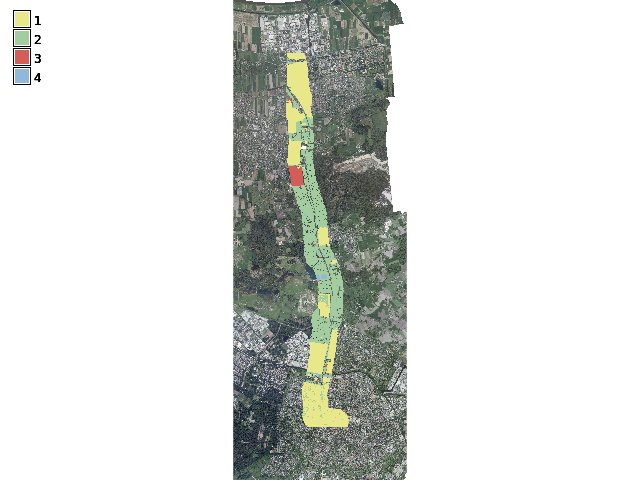

In [0]:
gs.run_command('d.erase')
gs.run_command('d.rast', map="chips_area_ortho")
gs.run_command('r.colors', map='landcover_buff50m', raster='chips_landuse')
gs.run_command('d.rast', map="landcover_buff50m")
gs.run_command('d.legend', raster="landcover_buff50m", range=(1, 4), at=(80, 100, 2, 10))
Image(filename="map.png")

## Viewshed Analysis


In [0]:
import os
filepath="/content/drive/My Drive/People-Environment-Toolbox"
os.chdir(filepath)
!python single_viewshed.py coordinates='132974.298831, 402771.310804' property_id=1 output=test